# Notebook for Jacobsville sandstone Pmag analyses

SC1: Snake Creek pmag site. Fine to medium sandstone. Coherent and strong material but have relatively low magnetization. Commonly have NRMs of E-5 emu. The high temperature (>660 degree C components are not very well resolved in demagnetization). 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pmagpy.pmag as pmag
import pmagpy.ipmag as ipmag
import matplotlib
import matplotlib.colors as colors
%matplotlib inline
%config InlineBackend.figure_format='retina'

In [2]:
from cartopy import config
import cartopy.crs as ccrs
import cartopy.feature as cfeature
from cartopy.io.shapereader import Reader
from cartopy.feature import ShapelyFeature
Laurentia_outline = ShapelyFeature(Reader('../Data/Laurentia_shape/Laurentia.shp').geometries(),
                                ccrs.PlateCarree(), facecolor = 'none', edgecolor='black')

## Compile previous data from the Jacobsville Sandstone

### Dubois (1962) 

Du Bois, P. M. (1962). Palaeomagnetism and Correlation Fo Keweenawan Rocks. La Commission, Energie, mines et ressources Canada.

In [47]:
Dubois1962a_samples = pd.read_csv('../Data/Pmag_compiled/Dubois1962a_samples.txt', sep='\t', header = 1)
Dubois1962a_samples = ipmag.vgp_calc(Dubois1962a_samples,   tilt_correction='no',
    site_lon='lon',
    site_lat='lat',
    dec_is='dir_dec',
    inc_is='dir_inc',)
Dubois1962a_samples.head()

site            location  dir_dec  dir_inc  lat   lon  geologic_classes  \
0  CA1  Keweenaw Peninsula    260.5    -22.0   47 -88.5               NaN   
1   J1  Keweenaw Peninsula    219.5    -15.5   47 -88.5               NaN   
2   J4  Keweenaw Peninsula    239.5    -27.5   47 -88.5               NaN   
3   J5  Keweenaw Peninsula    219.5     43.0   47 -88.5               NaN   
4   J6  Keweenaw Peninsula    245.5    -32.0   47 -88.5               NaN   

   geologic_types  lithologies  method_codes  result_quality  result_type  \
0             NaN          NaN           NaN             NaN          NaN   
1             NaN          NaN           NaN             NaN          NaN   
2             NaN          NaN           NaN             NaN          NaN   
3             NaN          NaN           NaN             NaN          NaN   
4             NaN          NaN           NaN             NaN          NaN   

   dip_trend  dip  paleolatitude    vgp_lat     vgp_lon  vgp_lat_rev  \
0        NaN  NaN     -11.420796 -14.782534  180.508784    14.782534   
1        NaN  NaN      -7.894424 -38.441075  217.946992    38.441075   
2        NaN  NaN     -14.589431 -31.278642  194.168393    31.278642   
3        NaN  NaN      24.997641  -9.665423  235.711499     9.665423   
4        NaN  NaN     -17.350615 -29.212765  187.161425    29.212765   

   vgp_lon_rev  
0     0.508784  
1    37.946992  
2    14.168393  
3    55.711499  
4     7.161425

In [48]:
Dubois1962a_samples_kewee = Dubois1962a_samples[Dubois1962a_samples['location'] == 'Keweenaw Peninsula']
Dubois1962a_samples_Marie = Dubois1962a_samples[Dubois1962a_samples['location'] == 'Sault Ste. Marie']

Dubois1962a_samples_kewee_mean = ipmag.fisher_mean(Dubois1962a_samples_kewee['dir_dec'].tolist(),
                                                   Dubois1962a_samples_kewee['dir_inc'].tolist())
Dubois1962a_samples_Marie_mean = ipmag.fisher_mean(Dubois1962a_samples_Marie['dir_dec'].tolist(),
                                                   Dubois1962a_samples_Marie['dir_inc'].tolist())

Dubois1962a_samples_kewee_mean_pole = ipmag.fisher_mean(Dubois1962a_samples_kewee['vgp_lon'].tolist(),
                                                        Dubois1962a_samples_kewee['vgp_lat'].tolist())
Dubois1962a_samples_Marie_mean_pole = ipmag.fisher_mean(Dubois1962a_samples_Marie['vgp_lon'].tolist(),
                                                        Dubois1962a_samples_Marie['vgp_lat'].tolist())

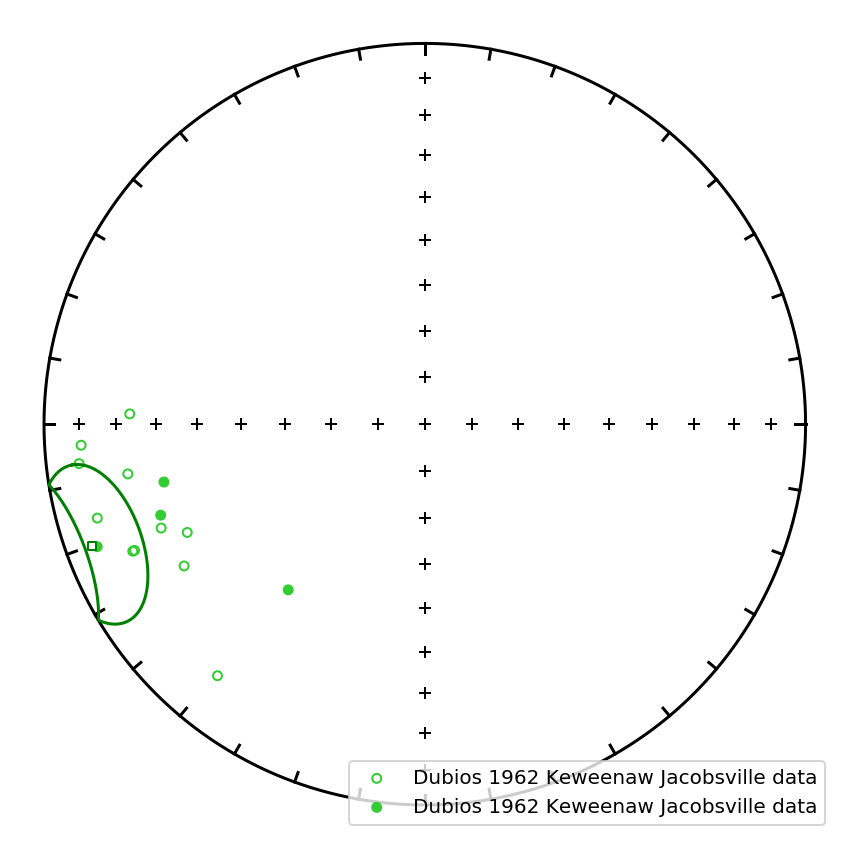

In [46]:
fignum = 1
plt.figure(num=fignum,figsize=(6,6))
ipmag.plot_net(fignum)

ipmag.plot_di(Dubois1962a_samples_kewee['dir_dec'].tolist(),Dubois1962a_samples_kewee['dir_inc'].tolist(),
              color='limegreen',label='Dubios 1962 Keweenaw Jacobsville data')
ipmag.plot_di_mean(Dubois1962a_samples_kewee_mean['dec'],Dubois1962a_samples_kewee_mean['inc'],Dubois1962a_samples_kewee_mean['alpha95'],
                   color='green', marker = 's')
plt.legend(loc=4)
# plt.savefig('../Figures/specimen_directions.pdf')
plt.show()

<Figure size 360x360 with 0 Axes>

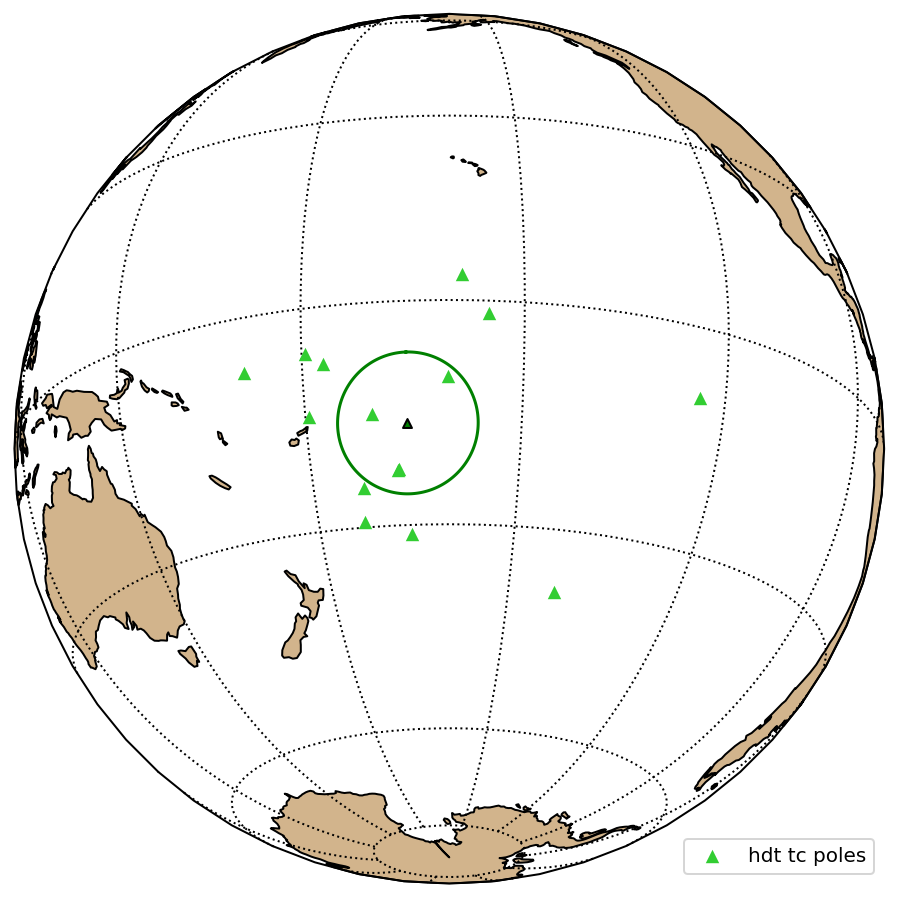

In [49]:
plt.figure(figsize=(5, 5))
map_axis=ipmag.make_orthographic_map(central_longitude=200,central_latitude=-20)

ipmag.plot_vgp(map_axis, Dubois1962a_samples_kewee['vgp_lon'].tolist(), 
               Dubois1962a_samples_kewee['vgp_lat'].tolist(), markersize = 45, marker = '^', color = 'limegreen', edge='none', label = 'hdt tc poles')

ipmag.plot_pole(map_axis, Dubois1962a_samples_kewee_mean_pole['dec'], 
                Dubois1962a_samples_kewee_mean_pole['inc'], 
                Dubois1962a_samples_kewee_mean_pole['alpha95'], 
                color = 'green', marker = '^')

plt.legend(loc=4)
plt.show()

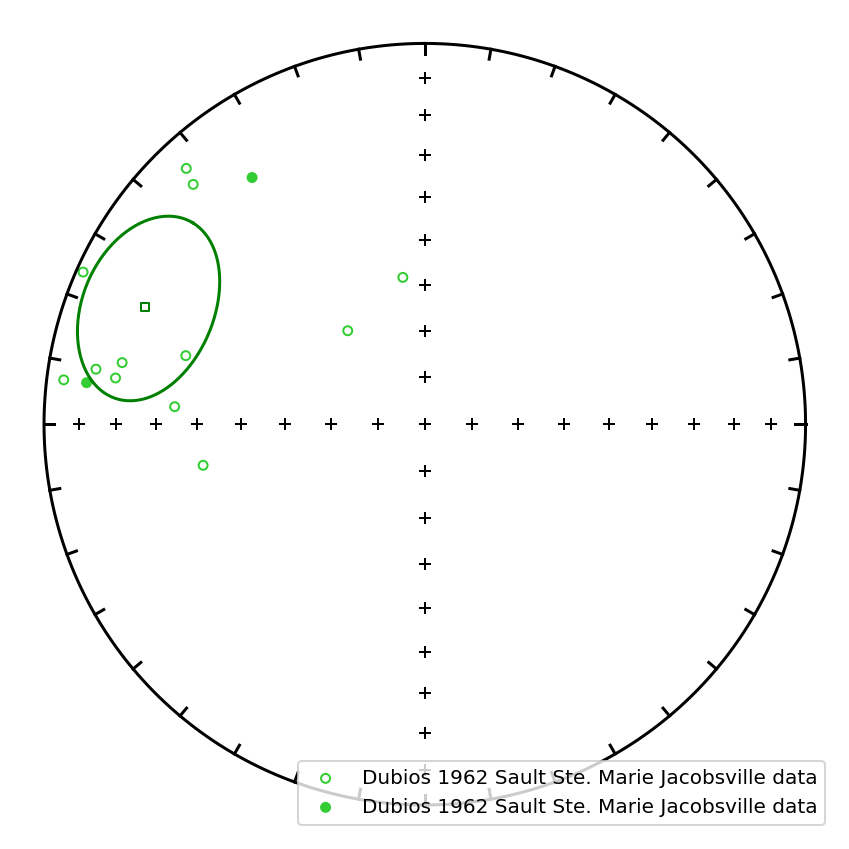

In [50]:
fignum = 1
plt.figure(num=fignum,figsize=(6,6))
ipmag.plot_net(fignum)

ipmag.plot_di(Dubois1962a_samples_Marie['dir_dec'].tolist(),Dubois1962a_samples_Marie['dir_inc'].tolist(),
              color='limegreen',label='Dubios 1962 Sault Ste. Marie Jacobsville data')
ipmag.plot_di_mean(Dubois1962a_samples_Marie_mean['dec'],Dubois1962a_samples_Marie_mean['inc'],Dubois1962a_samples_Marie_mean['alpha95'],
                   color='green', marker = 's')
plt.legend(loc=4)
# plt.savefig('../Figures/specimen_directions.pdf')
plt.show()

<Figure size 360x360 with 0 Axes>

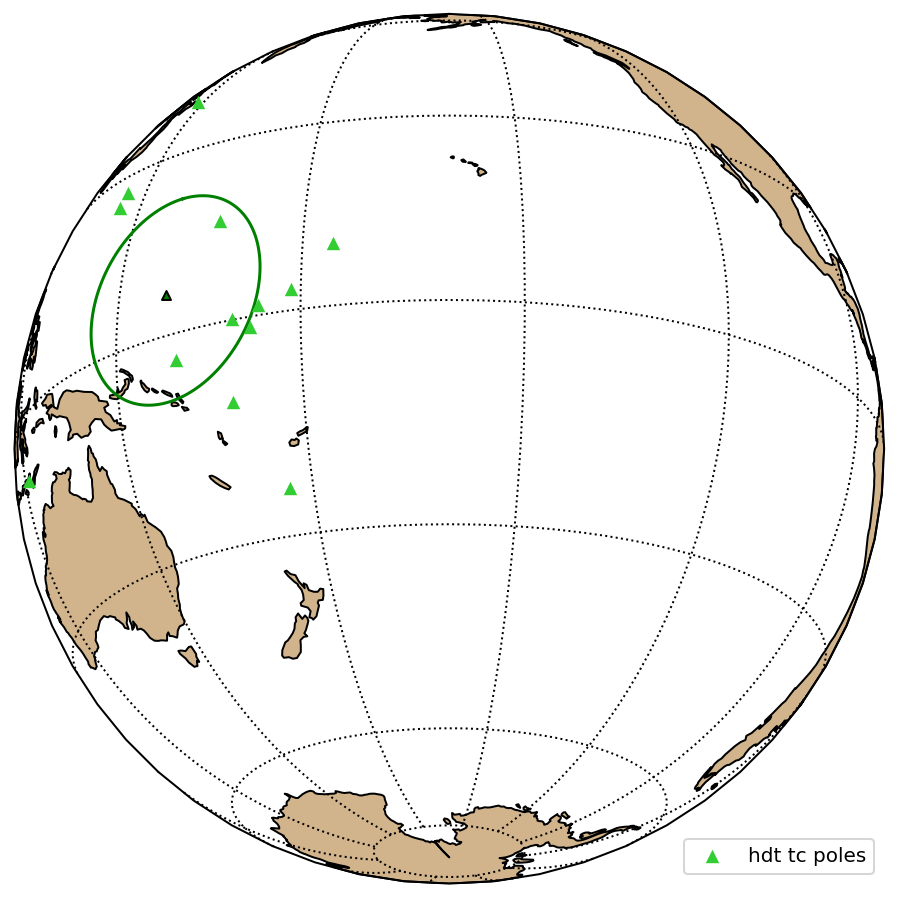

In [51]:
plt.figure(figsize=(5, 5))
map_axis=ipmag.make_orthographic_map(central_longitude=200,central_latitude=-20)

ipmag.plot_vgp(map_axis, Dubois1962a_samples_Marie['vgp_lon'].tolist(), 
               Dubois1962a_samples_Marie['vgp_lat'].tolist(), markersize = 45, marker = '^', color = 'limegreen', edge='none', label = 'hdt tc poles')

ipmag.plot_pole(map_axis, Dubois1962a_samples_Marie_mean_pole['dec'], 
                Dubois1962a_samples_Marie_mean_pole['inc'], 
                Dubois1962a_samples_Marie_mean_pole['alpha95'], 
                color = 'green', marker = '^')

plt.legend(loc=4)
plt.show()

### Roy (1978)

Roy, J. L., & Robertson, W. A. (1978). Paleomagnetism of the Jacobsville Formation and the apparent polar path for the interval− 1100 to− 670 my for North America. Journal of Geophysical Research: Solid Earth, 83(B3), 1289-1304.

Only J1 directions are compiled.

In [74]:
Roy1978a_sites = pd.read_csv('../Data/Pmag_compiled/Roy1978a_sites.txt', sep='\t', header=1)
Roy1978a_sites=Roy1978a_sites.dropna(axis=0)
Roy1978a_sites.head()

site           location Area  dir_dec  dir_inc  dir_k  dir_n_samples  \
9     10  Northern Michigan    A    243.0    -21.0    8.0             13   
10    11  Northern Michigan    A     99.0     20.0   11.0             11   
11    12  Northern Michigan    A     92.0     24.0   11.0              8   
12    13  Northern Michigan    A    255.0     -2.0   14.0             14   
15    16  Northern Michigan    A    270.0     -1.0   28.0              6   

    dir_n_specimens  dir_n_total_specimens  dir_alpha95   lat   lon  vgp_lon  \
9                13                     13         19.0  47.3 -79.2    195.0   
10               11                     11         24.0  47.3 -78.2    178.0   
11                8                      8         17.0  47.3 -77.2    171.0   
12               14                     14         17.0  47.3 -76.2    193.0   
15                6                      6         22.0  47.3 -73.2    180.0   

    vgp_lat  
9      26.0  
10      1.0  
11      8.0  
12     11.0  
15      0.0

In [75]:
Roy1978a_sites_mean = ipmag.fisher_mean(Roy1978a_sites['dir_dec'].tolist(), Roy1978a_sites['dir_inc'].tolist())

Roy1978a_sites_mean_pole = ipmag.fisher_mean(Roy1978a_sites['vgp_lon'].tolist(),
                                                        Roy1978a_sites['vgp_lat'].tolist())

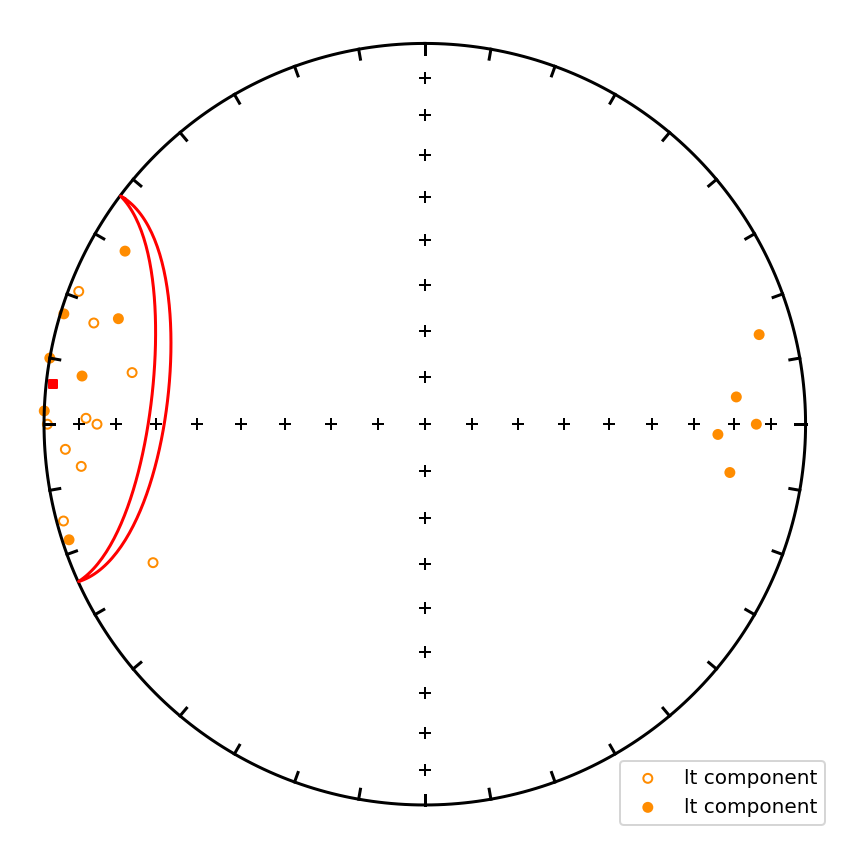

In [76]:
fignum = 1
plt.figure(num=fignum,figsize=(6,6))
ipmag.plot_net(fignum)

ipmag.plot_di(Roy1978a_sites['dir_dec'].tolist(),Roy1978a_sites['dir_inc'].tolist(),color='darkorange',label='lt component')

ipmag.plot_di_mean(Roy1978a_sites_mean['dec'],Roy1978a_sites_mean['inc'],Roy1978a_sites_mean['alpha95'],
                   color='red', marker = 's')

plt.legend(loc=4)
# plt.savefig('../Figures/specimen_directions.pdf')
plt.show()

<Figure size 360x360 with 0 Axes>

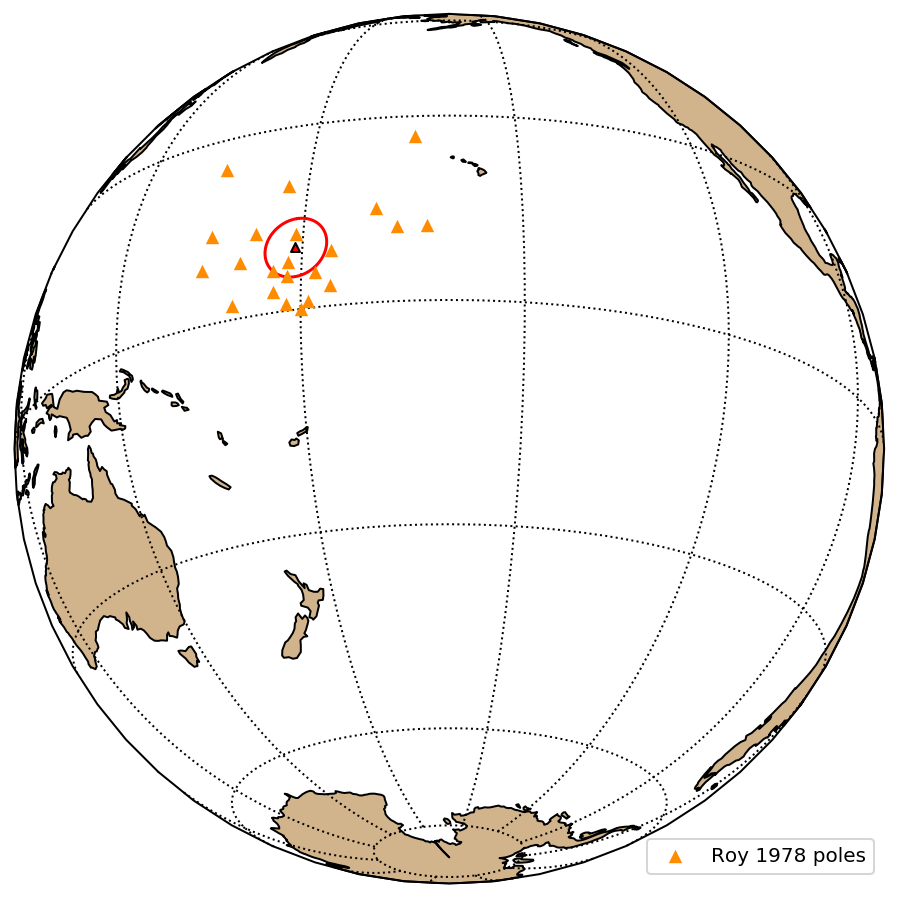

In [77]:
plt.figure(figsize=(5, 5))
map_axis=ipmag.make_orthographic_map(central_longitude=200,central_latitude=-20)

ipmag.plot_vgp(map_axis, Roy1978a_sites['vgp_lon'].tolist(), 
               Roy1978a_sites['vgp_lat'].tolist(), markersize = 45, marker = '^', color = 'darkorange', edge='none', label = 'Roy 1978 poles')

ipmag.plot_pole(map_axis, Roy1978a_sites_mean_pole['dec'], 
                Roy1978a_sites_mean_pole['inc'], 
                Roy1978a_sites_mean_pole['alpha95'], 
                color = 'red', marker = '^')

plt.legend(loc=4)
plt.show()

## New pmag data from this study

In [3]:
Jacobsville_data = pd.read_csv('../Data/Pmag_new/specimens.txt', sep='\t', header=1)

SC1_spec_data = Jacobsville_data[Jacobsville_data['specimen'].str.contains('SC')]
SC1_spec_data['vgp_lon'] = pmag.dia_vgp(SC1_spec_data['dir_dec'], SC1_spec_data['dir_inc'], 0, 47.3, -88.2)[0]
SC1_spec_data['vgp_lat'] = pmag.dia_vgp(SC1_spec_data['dir_dec'], SC1_spec_data['dir_inc'], 0, 47.3, -88.2)[1]
SC1_spec_data.head()

specimen       experiments  sample  dir_alpha95 dir_comp  dir_dec  \
154  SC1-10a               NaN  SC1-10          NaN      NaN      NaN   
155  SC1-10a  SC1-10a_LP-DIR-T  SC1-10          NaN      hdt    272.1   
156  SC1-10a  SC1-10a_LP-DIR-T  SC1-10          NaN      hdt    257.1   
157  SC1-10a  SC1-10a_LP-DIR-T  SC1-10          NaN       lt    195.3   
158  SC1-10a  SC1-10a_LP-DIR-T  SC1-10          NaN      hdt      8.1   

     dir_inc  dir_n_comps  dir_n_measurements  dir_tilt_correction  ...  \
154      NaN          NaN                 NaN                  NaN  ...   
155      3.9          2.0                14.0                100.0  ...   
156    -18.2          2.0                14.0                  0.0  ...   
157     51.1          2.0                 3.0                  0.0  ...   
158      3.5          2.0                14.0                 -1.0  ...   

     int_corr   citations                   method_codes  result_quality  \
154       NaN  This study                       LP-NOMAG             NaN   
155         u  This study  LP-DIR-T:DE-BFL-A:DA-DIR-TILT               g   
156         u  This study   LP-DIR-T:DE-BFL-A:DA-DIR-GEO               g   
157         u  This study     LP-DIR-T:DE-BFL:DA-DIR-GEO               g   
158         u  This study       LP-DIR-T:DE-BFL-A:DA-DIR               g   

    volume  weight            location site     vgp_lon    vgp_lat  
154    NaN     NaN  Northern Wisconsin  SC1         NaN        NaN  
155    NaN     NaN  Northern Wisconsin  SC1  181.581337   2.858644  
156    NaN     NaN  Northern Wisconsin  SC1  184.887974 -15.581435  
157    NaN     NaN  Northern Wisconsin  SC1  258.645869  -9.725402  
158    NaN     NaN  Northern Wisconsin  SC1   80.526512  43.911349  

[5 rows x 28 columns]

- lt component: low temperature component of the fit, using geographic coordinates
- mt component: mid temperture component, compare geographic and tilt corrected coordinates
- ht component: high temperature component, compare geographic and tilt corrected coordinates

In [4]:
SC1_spec_lt = SC1_spec_data[(SC1_spec_data['dir_comp'] == 'lt') & (SC1_spec_data['dir_tilt_correction'] == 0)]

SC1_spec_hdt_gc = SC1_spec_data[(SC1_spec_data['dir_comp'] == 'hdt') & (SC1_spec_data['dir_tilt_correction'] == 0)]
SC1_spec_hdt_tc = SC1_spec_data[(SC1_spec_data['dir_comp'] == 'hdt') & (SC1_spec_data['dir_tilt_correction'] == 100)]

### Plot Snake Creek sandstone pmag components

In [6]:
SC1_spec_lt_mean = ipmag.fisher_mean(SC1_spec_lt['dir_dec'].tolist(), SC1_spec_lt['dir_inc'].tolist())
SC1_spec_hdt_gc_mean = ipmag.fisher_mean(SC1_spec_hdt_gc['dir_dec'].tolist(), SC1_spec_hdt_gc['dir_inc'].tolist())
SC1_spec_hdt_tc_mean = ipmag.fisher_mean(SC1_spec_hdt_tc['dir_dec'].tolist(), SC1_spec_hdt_tc['dir_inc'].tolist())

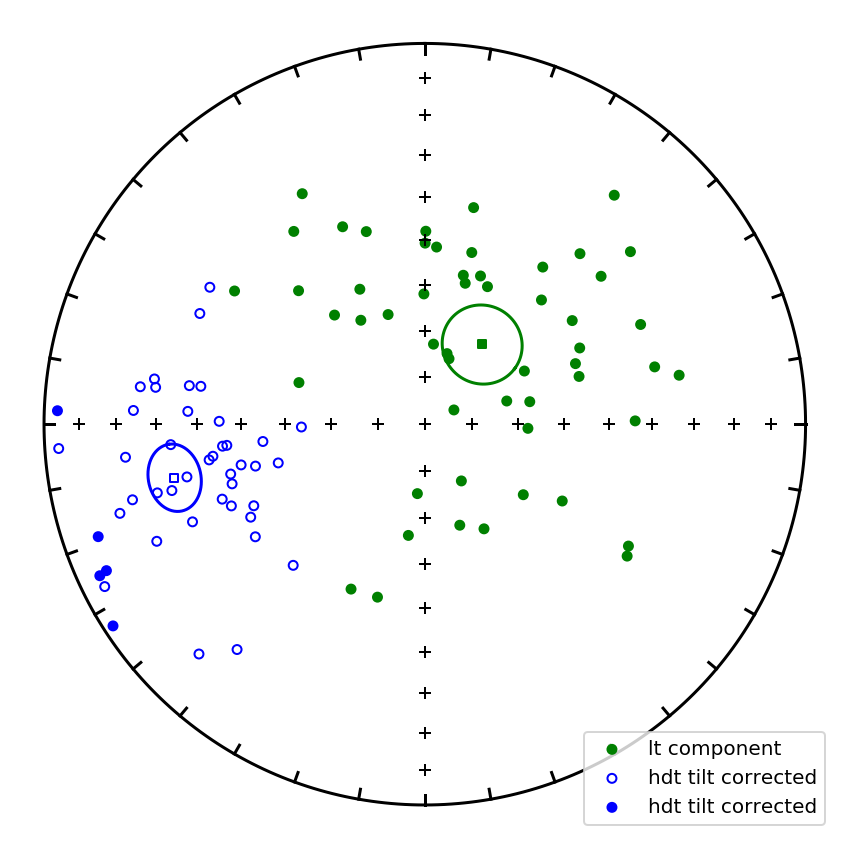

In [21]:
fignum = 1
plt.figure(num=fignum,figsize=(6,6))
ipmag.plot_net(fignum)

ipmag.plot_di(SC1_spec_lt['dir_dec'].tolist(),SC1_spec_lt['dir_inc'].tolist(),color='green',label='lt component')

# ipmag.plot_di(SC1_spec_hdt_gc['dir_dec'].tolist(),SC1_spec_hdt_gc['dir_inc'].tolist(),color='dodgerblue',label='hdt geographic')
ipmag.plot_di(SC1_spec_hdt_tc['dir_dec'].tolist(),SC1_spec_hdt_tc['dir_inc'].tolist(),color='blue',label='hdt tilt corrected')


ipmag.plot_di_mean(SC1_spec_lt_mean['dec'],SC1_spec_lt_mean['inc'],SC1_spec_lt_mean['alpha95'],
                   color='green', marker = 's')
# ipmag.plot_di_mean(SC1_spec_hdt_gc_mean['dec'],SC1_spec_hdt_gc_mean['inc'],SC1_spec_hdt_gc_mean['alpha95'],
#                    color='dodgerblue', marker = 's')
ipmag.plot_di_mean(SC1_spec_hdt_tc_mean['dec'],SC1_spec_hdt_tc_mean['inc'],SC1_spec_hdt_tc_mean['alpha95'],
                   color='blue', marker = 's')


plt.legend(loc=4)
# plt.savefig('../Figures/specimen_directions.pdf')
plt.show()

In [10]:
SC1_spec_hdt_gc_mean_pole = ipmag.fisher_mean(SC1_spec_hdt_gc['vgp_lon'].tolist(), SC1_spec_hdt_gc['vgp_lat'].tolist())
SC1_spec_hdt_tc_mean_pole = ipmag.fisher_mean(SC1_spec_hdt_tc['vgp_lon'].tolist(), SC1_spec_hdt_tc['vgp_lat'].tolist())

<Figure size 360x360 with 0 Axes>

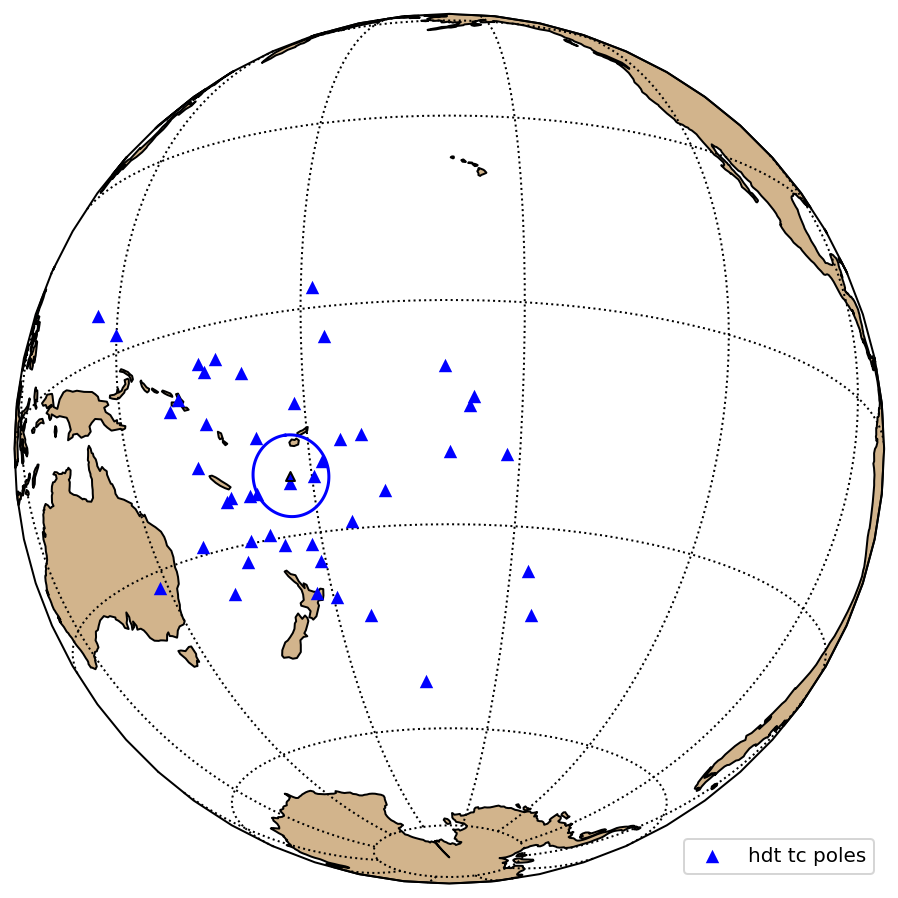

In [25]:
plt.figure(figsize=(5, 5))
map_axis=ipmag.make_orthographic_map(central_longitude=200,central_latitude=-20)

# ipmag.plot_vgp(map_axis, SC1_spec_hdt_gc['vgp_lon'].tolist(), 
#                SC1_spec_hdt_gc['vgp_lat'].tolist(), color = 'dodgerblue', label = 'hdt gc poles')
ipmag.plot_vgp(map_axis, SC1_spec_hdt_tc['vgp_lon'].tolist(), 
               SC1_spec_hdt_tc['vgp_lat'].tolist(), markersize = 45, marker = '^', color = 'blue', edge='none', label = 'hdt tc poles')

# ipmag.plot_pole(map_axis, SC1_spec_hdt_gc_mean_pole['dec'], SC1_spec_hdt_gc_mean_pole['inc'], SC1_spec_hdt_gc_mean_pole['alpha95'], 
#                 color = 'dodgerblue', marker = 's')
ipmag.plot_pole(map_axis, SC1_spec_hdt_tc_mean_pole['dec'], SC1_spec_hdt_tc_mean_pole['inc'], SC1_spec_hdt_tc_mean_pole['alpha95'], 
                color = 'blue', marker = '^')

plt.legend(loc=4)
plt.show()

### Unsquish ht component by 0.6

In [18]:
f = 0.6

SC1_spec_hdt_tc['dir_inc_unsquish'] = ipmag.unsquish(SC1_spec_hdt_tc['dir_inc'].tolist(), f)
SC1_spec_hdt_tc['vgp_lon_unsquish'] = pmag.dia_vgp(SC1_spec_hdt_tc['dir_dec'], SC1_spec_hdt_tc['dir_inc_unsquish'], 0, 47.3, -88.2)[0]
SC1_spec_hdt_tc['vgp_lat_unsquish'] = pmag.dia_vgp(SC1_spec_hdt_tc['dir_dec'], SC1_spec_hdt_tc['dir_inc_unsquish'], 0, 47.3, -88.2)[1]

SC1_spec_hdt_tc_unsquish_mean = ipmag.fisher_mean(SC1_spec_hdt_tc['dir_dec'].tolist(), SC1_spec_hdt_tc['dir_inc_unsquish'].tolist())
SC1_spec_hdt_tc_unsquish_mean_pole = ipmag.fisher_mean(SC1_spec_hdt_tc['vgp_lon_unsquish'].tolist(), SC1_spec_hdt_tc['vgp_lat_unsquish'].tolist())

In [29]:
ipmag.print_direction_mean(SC1_spec_hdt_tc_unsquish_mean)

Dec: 257.6  Inc: -44.8
Number of directions in mean (n): 45
Angular radius of 95% confidence (a_95): 7.2
Precision parameter (k) estimate: 9.7


In [31]:
ipmag.print_direction_mean(SC1_spec_hdt_tc_mean)

Dec: 257.9  Inc: -33.2
Number of directions in mean (n): 45
Angular radius of 95% confidence (a_95): 6.4
Precision parameter (k) estimate: 12.1


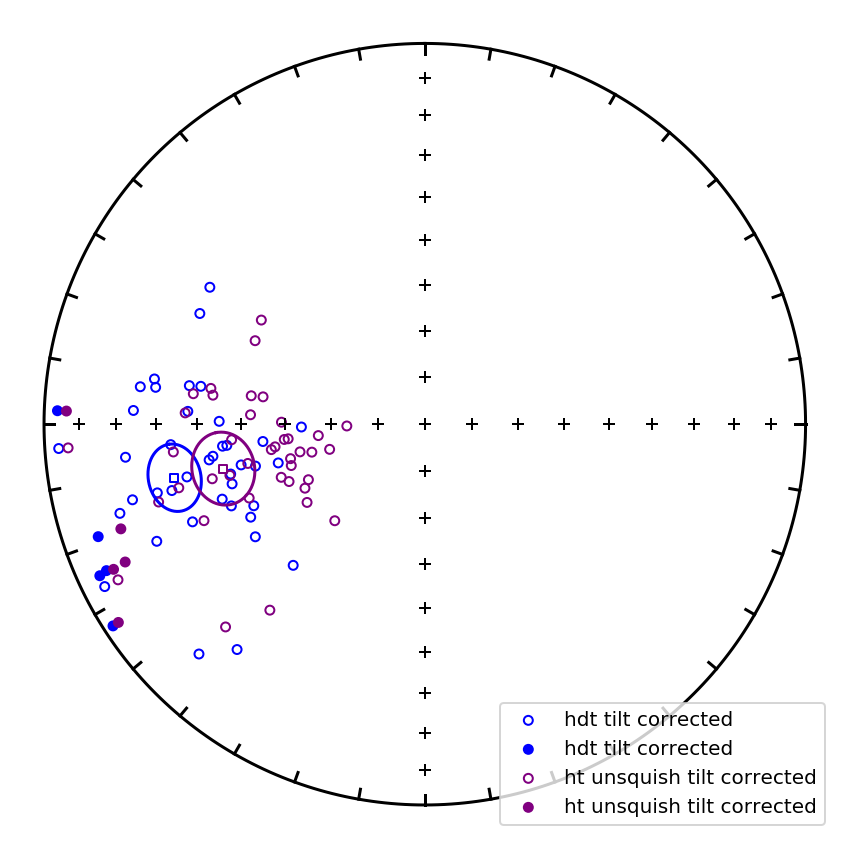

In [26]:
fignum = 1
plt.figure(num=fignum,figsize=(6,6))
ipmag.plot_net(fignum)

ipmag.plot_di(SC1_spec_hdt_tc['dir_dec'].tolist(),SC1_spec_hdt_tc['dir_inc'].tolist(),color='blue',label='hdt tilt corrected')
ipmag.plot_di(SC1_spec_hdt_tc['dir_dec'].tolist(),SC1_spec_hdt_tc['dir_inc_unsquish'].tolist(),color='purple',label='hdt unsquish tilt corrected')

ipmag.plot_di_mean(SC1_spec_hdt_tc_mean['dec'],SC1_spec_hdt_tc_mean['inc'],SC1_spec_hdt_tc_mean['alpha95'],
                   color='blue', marker = 's')
ipmag.plot_di_mean(SC1_spec_hdt_tc_unsquish_mean['dec'],SC1_spec_hdt_tc_unsquish_mean['inc'],SC1_spec_hdt_tc_unsquish_mean['alpha95'],
                   color='purple', marker = 's')

plt.legend(loc=4)
# plt.savefig('../Figures/specimen_directions.pdf')
plt.show()

<Figure size 360x360 with 0 Axes>

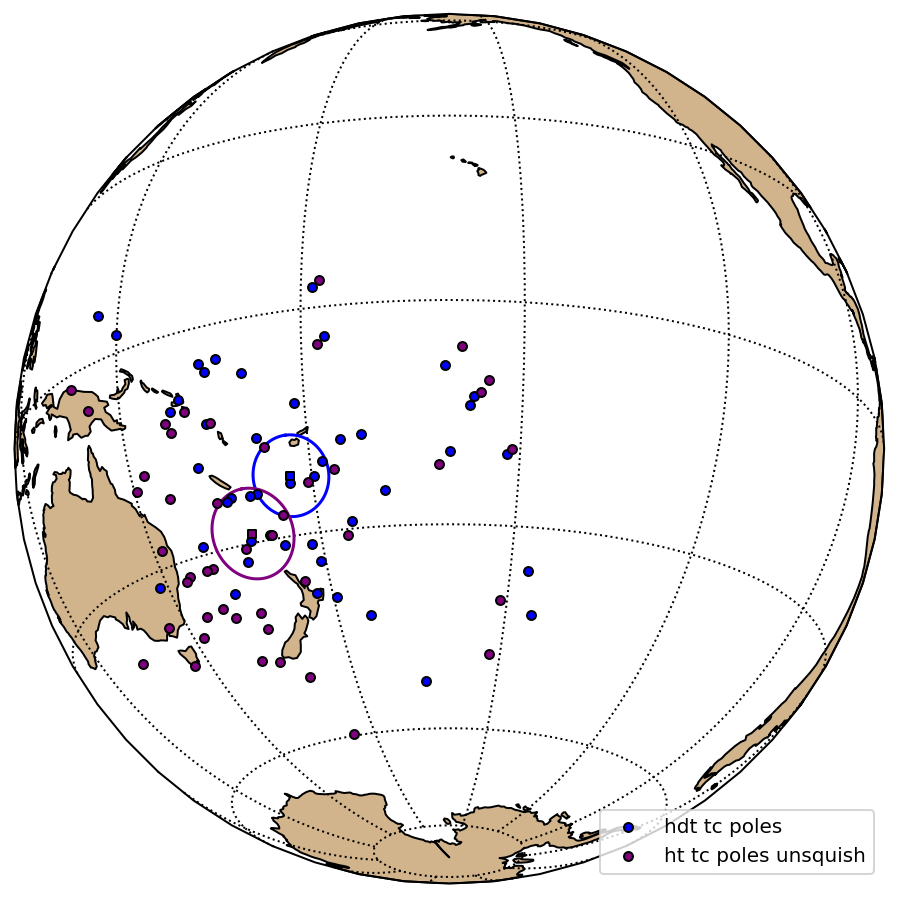

In [28]:
plt.figure(figsize=(5, 5))
map_axis=ipmag.make_orthographic_map(central_longitude=200,central_latitude=-20)

ipmag.plot_vgp(map_axis, SC1_spec_hdt_tc['vgp_lon'].tolist(), SC1_spec_hdt_tc['vgp_lat'].tolist(), color = 'blue', label = 'hdt tc poles')
ipmag.plot_vgp(map_axis, SC1_spec_hdt_tc['vgp_lon_unsquish'].tolist(), SC1_spec_hdt_tc['vgp_lat_unsquish'].tolist(), 
               color = 'purple', label = 'ht tc poles unsquish')

ipmag.plot_pole(map_axis, SC1_spec_hdt_tc_mean_pole['dec'], SC1_spec_hdt_tc_mean_pole['inc'], SC1_spec_hdt_tc_mean_pole['alpha95'], 
                color = 'blue', marker = 's')
ipmag.plot_pole(map_axis, SC1_spec_hdt_tc_unsquish_mean_pole['dec'], SC1_spec_hdt_tc_unsquish_mean_pole['inc'], SC1_spec_hdt_tc_unsquish_mean_pole['alpha95'], 
                color = 'purple', marker = 's')


plt.legend(loc=4)
plt.show()

### Plot poles with Keweenawan track

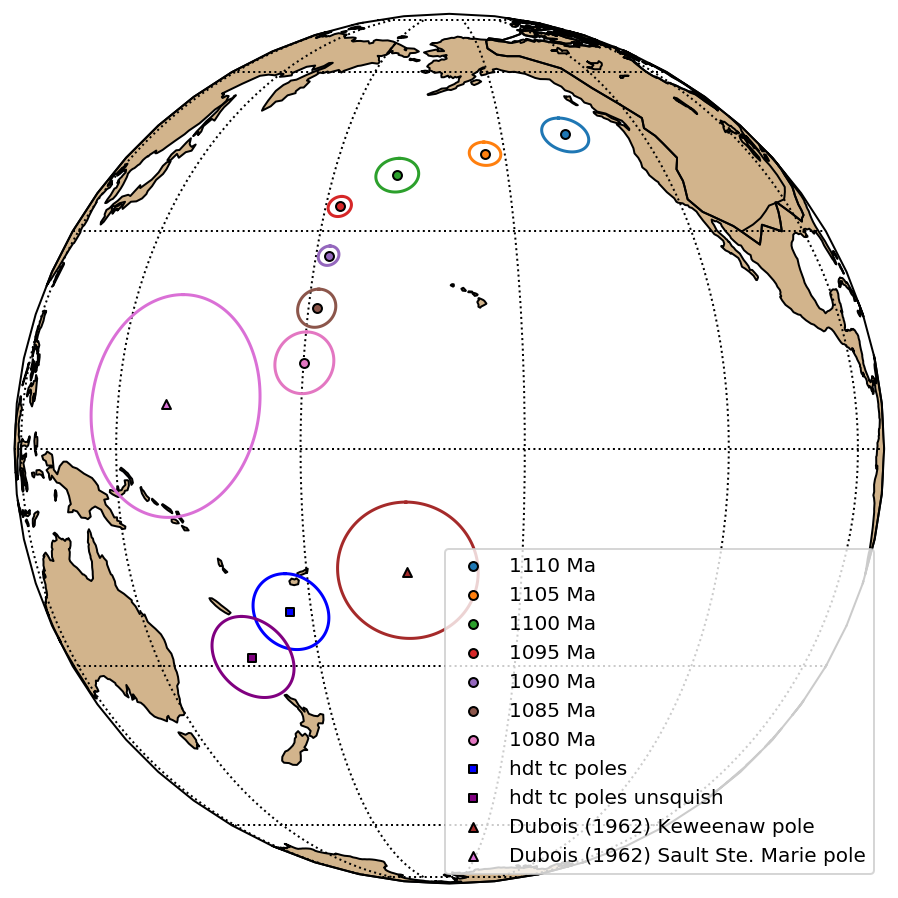

In [52]:
one_Euler_pole_lon = np.loadtxt('../Data/Keweenawan_track/pole_lon_positions_2_true.txt')
one_Euler_pole_lat = np.loadtxt('../Data/Keweenawan_track/pole_lat_positions_2_true.txt')

m = ipmag.make_orthographic_map(central_latitude=0,central_longitude=200)
m.add_feature(Laurentia_outline)
plt.figure(num=1,figsize=(10, 10))

fisher0 = ipmag.fisher_mean(one_Euler_pole_lon[:,0]+180,one_Euler_pole_lat[:,0])
theta0 = ipmag.fisher_angular_deviation(one_Euler_pole_lon[:,0]+180,one_Euler_pole_lat[:,0])
fisher0['theta'] = theta0
ipmag.plot_pole(m,fisher0['dec'],fisher0['inc'],theta0,color='C0',label='1110 Ma')

fisher1 = ipmag.fisher_mean(one_Euler_pole_lon[:,1]+180,one_Euler_pole_lat[:,1])
theta1 = ipmag.fisher_angular_deviation(one_Euler_pole_lon[:,1]+180,one_Euler_pole_lat[:,1])
fisher1['theta'] = theta1
ipmag.plot_pole(m,fisher1['dec'],fisher1['inc'],theta1,color='C1',label='1105 Ma')

fisher2 = ipmag.fisher_mean(one_Euler_pole_lon[:,2]+180,one_Euler_pole_lat[:,2])
theta2 = ipmag.fisher_angular_deviation(one_Euler_pole_lon[:,2]+180,one_Euler_pole_lat[:,2])
fisher2['theta'] = theta2
ipmag.plot_pole(m,fisher2['dec'],fisher2['inc'],theta2,color='C2',label='1100 Ma')

fisher3 = ipmag.fisher_mean(one_Euler_pole_lon[:,3]+180,one_Euler_pole_lat[:,3])
theta3 = ipmag.fisher_angular_deviation(one_Euler_pole_lon[:,3]+180,one_Euler_pole_lat[:,3])
fisher3['theta'] = theta3
ipmag.plot_pole(m,fisher3['dec'],fisher3['inc'],theta3,color='C3',label='1095 Ma')

fisher4 = ipmag.fisher_mean(one_Euler_pole_lon[:,4]+180,one_Euler_pole_lat[:,4])
theta4 = ipmag.fisher_angular_deviation(one_Euler_pole_lon[:,4]+180,one_Euler_pole_lat[:,4])
fisher4['theta'] = theta4
ipmag.plot_pole(m,fisher4['dec'],fisher4['inc'],theta4,color='C4',label='1090 Ma')

fisher5 = ipmag.fisher_mean(one_Euler_pole_lon[:,5]+180,one_Euler_pole_lat[:,5])
theta5 = ipmag.fisher_angular_deviation(one_Euler_pole_lon[:,5]+180,one_Euler_pole_lat[:,5])
fisher5['theta'] = theta5
ipmag.plot_pole(m,fisher5['dec'],fisher5['inc'],theta5,color='C5',label='1085 Ma')

fisher6 = ipmag.fisher_mean(one_Euler_pole_lon[:,6]+180,one_Euler_pole_lat[:,6])
theta6 = ipmag.fisher_angular_deviation(one_Euler_pole_lon[:,6]+180,one_Euler_pole_lat[:,6])
fisher6['theta'] = theta6
ipmag.plot_pole(m,fisher6['dec'],fisher6['inc'],theta6,color='C6',label='1080 Ma')

ipmag.plot_pole(m, SC1_spec_hdt_tc_mean_pole['dec'], SC1_spec_hdt_tc_mean_pole['inc'], SC1_spec_hdt_tc_mean_pole['alpha95'], 
                color = 'blue', marker = 's', label = 'hdt tc poles')
ipmag.plot_pole(m, SC1_spec_hdt_tc_unsquish_mean_pole['dec'], SC1_spec_hdt_tc_unsquish_mean_pole['inc'], SC1_spec_hdt_tc_unsquish_mean_pole['alpha95'], 
                color = 'purple', marker = 's', label = 'hdt tc poles unsquish')

ipmag.plot_pole(m, Dubois1962a_samples_kewee_mean_pole['dec'], 
                Dubois1962a_samples_kewee_mean_pole['inc'], 
                Dubois1962a_samples_kewee_mean_pole['alpha95'], 
                color = 'brown', marker = '^', label = 'Dubois (1962) Keweenaw pole')

ipmag.plot_pole(m, Dubois1962a_samples_Marie_mean_pole['dec'], 
                Dubois1962a_samples_Marie_mean_pole['inc'], 
                Dubois1962a_samples_Marie_mean_pole['alpha95'], 
                color = 'orchid', marker = '^', label = 'Dubois (1962) Sault Ste. Marie pole')

plt.legend(loc=4)
plt.show()

### Overview APWP

In [33]:
poles = pd.read_csv('../Data/Laurentia_poles/Laurentia_poles.csv')
poles = poles[8:]
poles.head()

Unnamed: 0                    PoleName  SLat    SLon  PLat   PLon  \
8       Mackenzie  Mackenzie dykes grand mean  65.0  250.00   4.0  190.0   
9         Sudbury      Sudbury Dykes Combined  46.3  278.60  -2.5  192.8   
10     Lamp_dikes           Lamprophyre dikes  48.8  273.30  58.0  223.3   
11  Abitibi_dikes               Abitibi dykes  48.0  279.00  44.4  211.4   
12       Osler_R1       Osler reverse (lower)  48.8  272.34  40.9  218.6   

     A95     K     N                      PolarityZone  \
8    5.0   NaN   5.0                               NaN   
9    2.5   NaN  52.0                               NaN   
10   9.2  37.8  19.0                 multiple polarity   
11  13.5   NaN   8.0                 multiple polarity   
12   4.8  31.5  30.0  Alona Bay reversed-polarity zone   

                                              PmagRef  AgeNominal  AgeLower  \
8                                 Buchan et al., 2000      1267.0   1265.00   
9            Palmer,H.C., Merz,B.A., Hayatsu,A., 1977      1237.0   1232.00   
10                                Piispa et al., 2018      1144.0   1130.00   
11  Ernst and Buchan (1993) and Halls et al. (2005...      1141.0   1139.00   
12                       Swanson-Hysell et al., 2014b      1108.0   1105.15   

    AgeUpper                                            AgeInfo  \
8     1269.0                                                NaN   
9     1242.0                                                NaN   
10    1155.0         U-Pb perovskite and Ar-Ar phlogopite dates   
11    1143.0                           U-Pb date on baddeleyite   
12    1110.0  Older than 1105.15 $\pm$ 0.33 Ma Osler reverse...   

                                   AgeRef  Gaussian_2sigma GaussianOrUniform  \
8                                     NaN              NaN               NaN   
9                                     NaN              NaN               NaN   
10                    Queen et al. (1996)              NaN               NaN   
11                      Krogh et al. 1987              NaN               NaN   
12  Davis and Sutcliffe, 1985; this study              NaN           uniform   

      Q    color  
8   NaN      NaN  
9   NaN      NaN  
10  NaN      NaN  
11  NaN      NaN  
12  7.0  #B82431

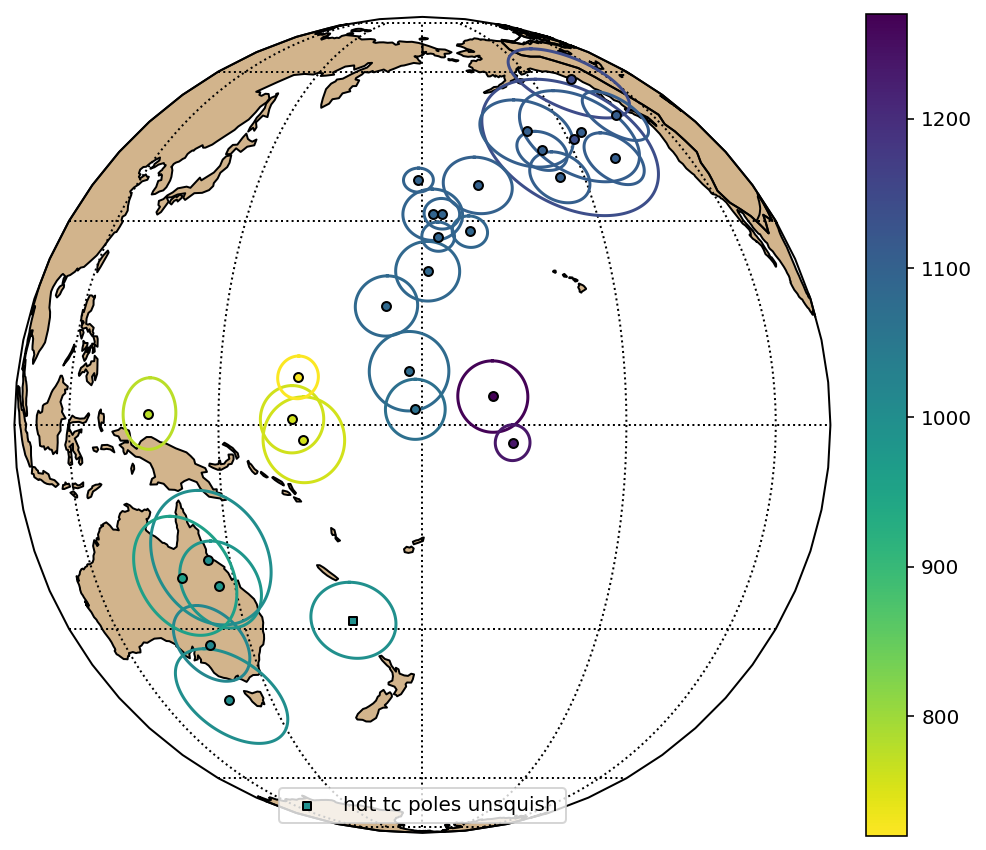

In [37]:
m = ipmag.make_orthographic_map(central_latitude=0,central_longitude=180)
m.add_feature(Laurentia_outline)
plt.figure(num=1,figsize=(10, 10))

viridis = cm = plt.get_cmap('viridis') 
cNorm  = colors.Normalize(vmin=720, vmax=1270)
# scalarMap = matplotlib.cm.ScalarMappable(norm=cNorm, cmap='viridis_r')
scalarMap = matplotlib.cm.ScalarMappable(norm=cNorm, cmap='viridis_r')

for n in poles.index:
    rgba = scalarMap.to_rgba(poles.AgeNominal[n])
    hex_color = colors.rgb2hex(rgba)
#     hex_color
    ipmag.plot_pole(m,poles.PLon[n],poles.PLat[n],poles.A95[n],color=hex_color)

Jacobsville_color = colors.rgb2hex(scalarMap.to_rgba(995))
ipmag.plot_pole(m, SC1_spec_hdt_tc_unsquish_mean_pole['dec'], SC1_spec_hdt_tc_unsquish_mean_pole['inc'], SC1_spec_hdt_tc_unsquish_mean_pole['alpha95'], 
                color = Jacobsville_color, marker = 's', label = 'hdt tc poles unsquish')

scalarMap.set_array(np.linspace(720,1110))    
plt.colorbar(scalarMap,orientation='vertical',fraction=0.046, pad=0.04)
plt.legend(loc=8)
#plt.savefig('../Figures/Kewee_Track_Grenville_Loop.pdf')
plt.show()

### test E/I method

Bootstrapping.... be patient

The original inclination was: 34.25610446215444

The corrected inclination is: 36.81261728956039
with bootstrapped confidence bounds of: 30.590001522987023 to 49.8257440864465
and elongation parameter of: 2.036321777039035
The flattening factor is: 0.9049999999999999


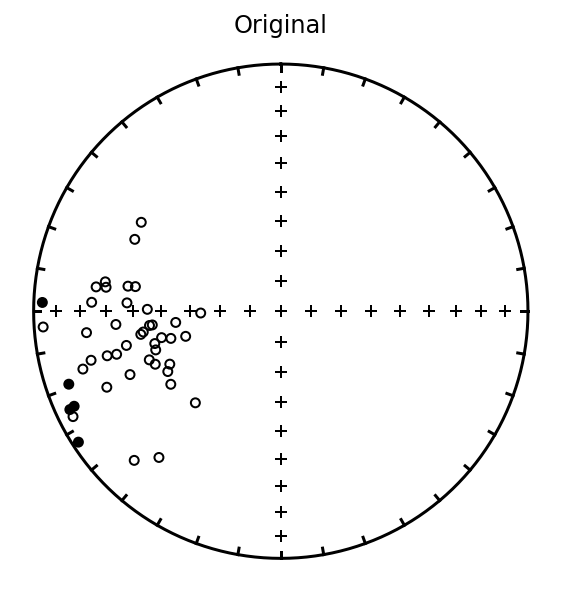

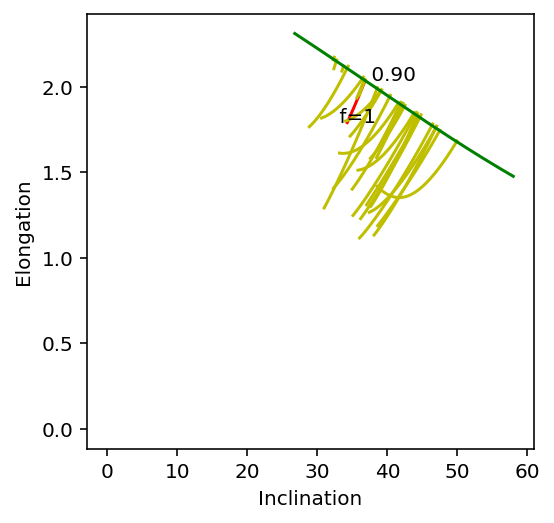

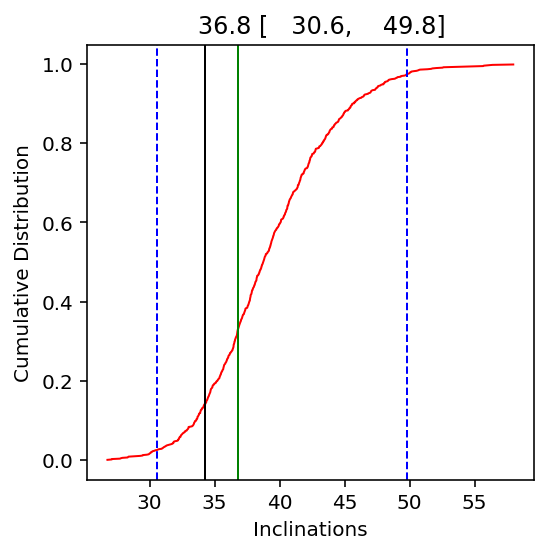

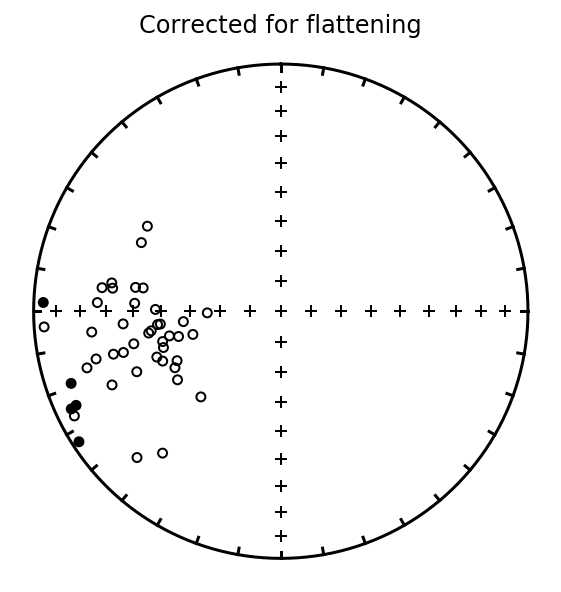

In [38]:
hdt_tc_di_block = ipmag.make_di_block(SC1_spec_hdt_tc['dir_dec'].tolist(), SC1_spec_hdt_tc['dir_inc'].tolist())
hdt_tc_ei_corrected = ipmag.find_ei(np.array(hdt_tc_di_block),save=False, return_new_dirs=True)

### unflattening result of Jacobsville directions

- It turns out 0.6 for flattening facter does make the scatter of the directions worse - an increase in A95 value from 6.4 to 7.2
- the E/I method also shows the predicted flattening factor is 0.9... with a wide range of uncertainty